In [15]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
del df['Product_Category_2']
del df['Product_Category_3']

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


In [7]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


# ANALYZING GENDER

In [8]:
len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])

(405380, 132197)

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='None'>

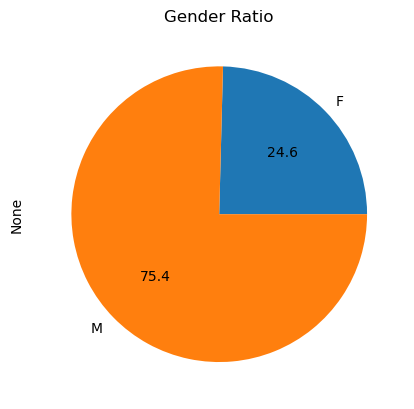

In [10]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = "%.1f", title = 'Gender Ratio')

<AxesSubplot:xlabel='Gender'>

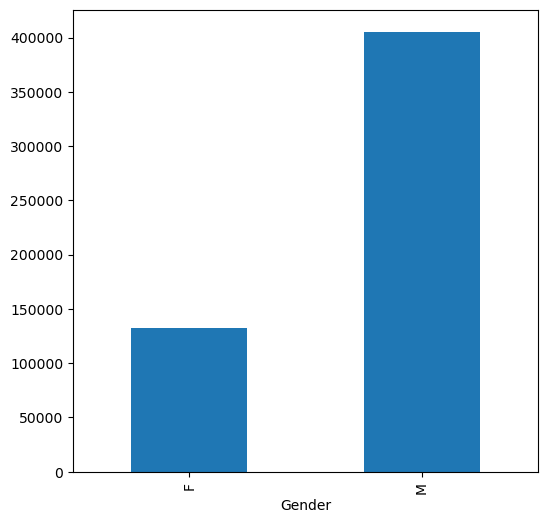

In [11]:
df.groupby('Gender').size().plot(kind = 'bar', 
                                 figsize = (6,6))

# ANALYZING AGE AND MARITIAL STATUS

<AxesSubplot:title={'center':'Purchase Distribution by Age'}, xlabel='Age'>

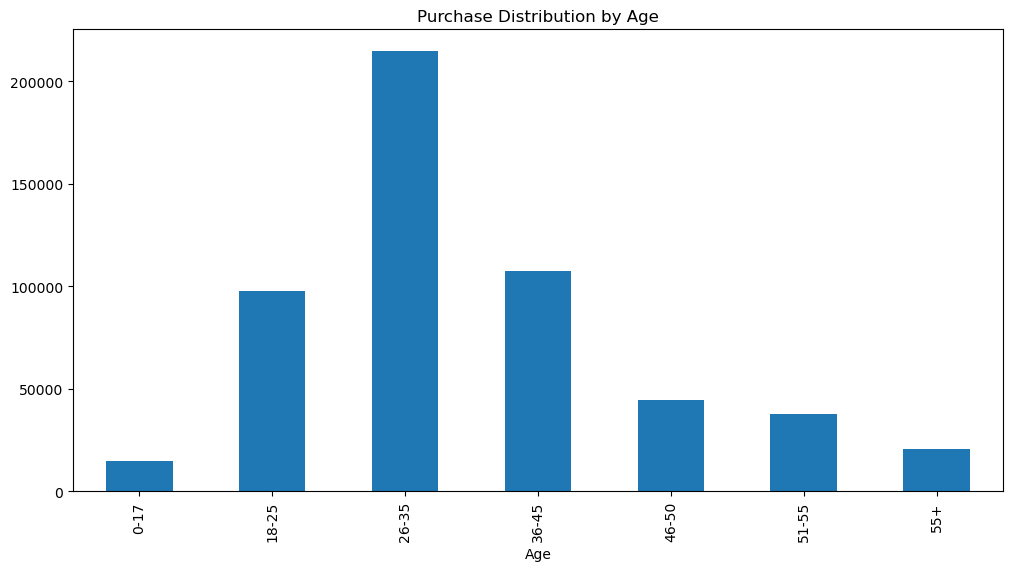

In [12]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = 'Purchase Distribution by Age')

<AxesSubplot:xlabel='Age'>

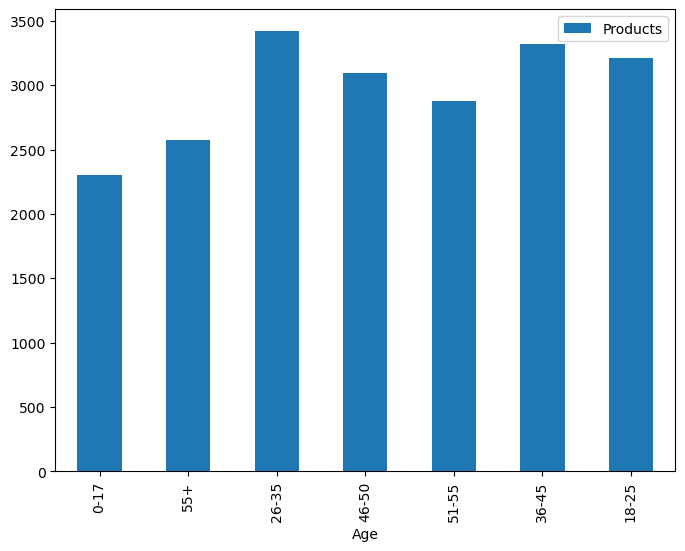

In [13]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])
    
data = pd.DataFrame(lst , columns = ['Age','Products'])
data.plot.bar(x = 'Age', figsize = (8,6))

<AxesSubplot:title={'center':'Amount Spend by Age'}, xlabel='Age'>

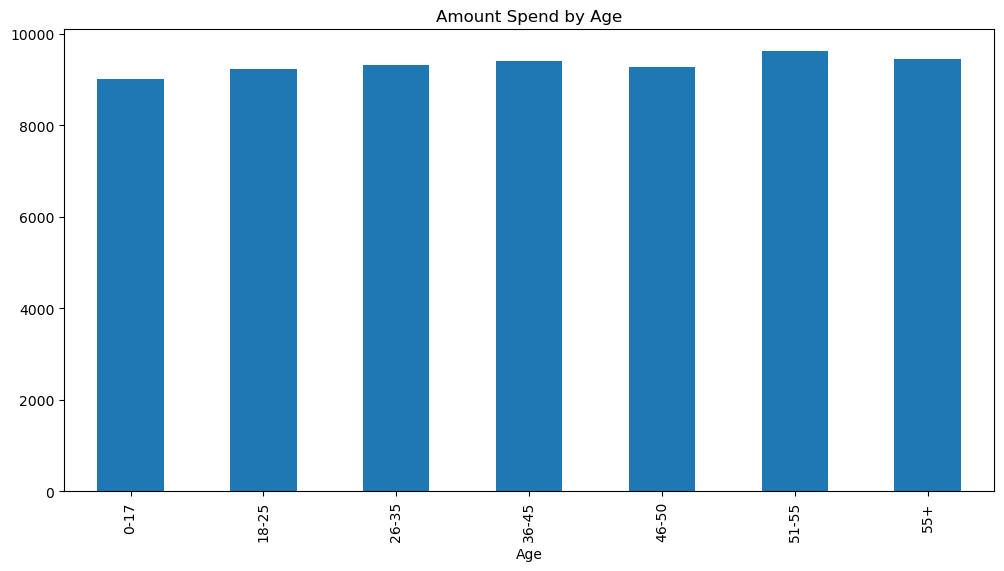

In [14]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')

# ANALYZING MULTIPLE COLUMNS


<AxesSubplot:xlabel='Age', ylabel='count'>

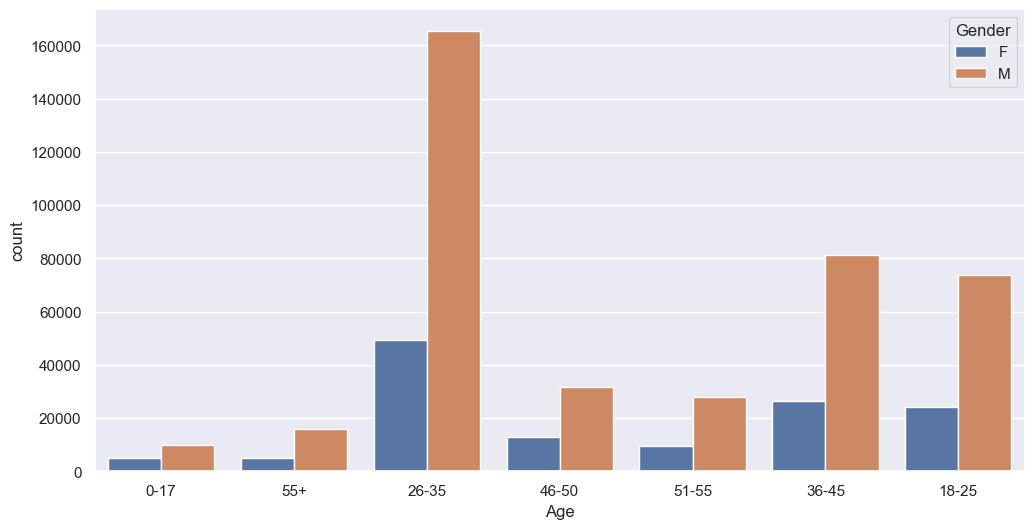

In [16]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

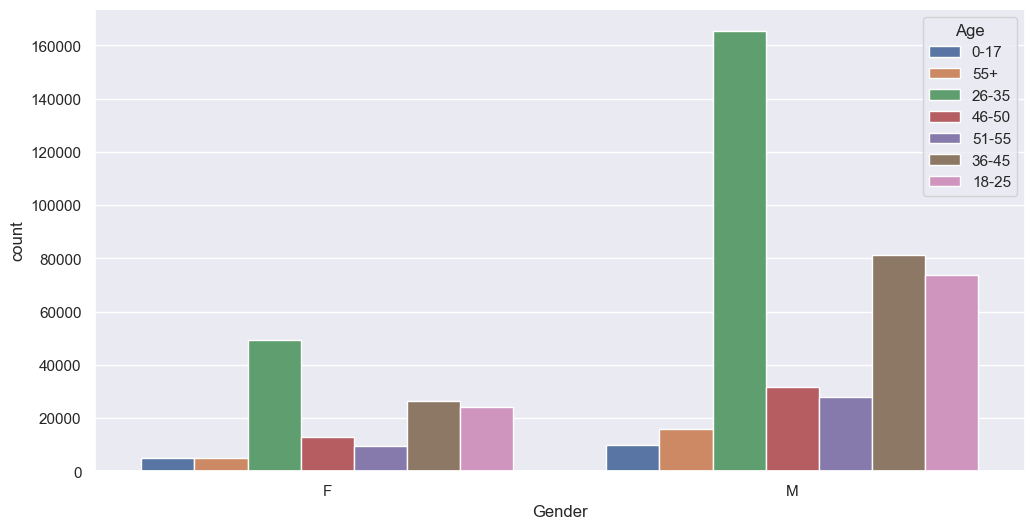

In [17]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

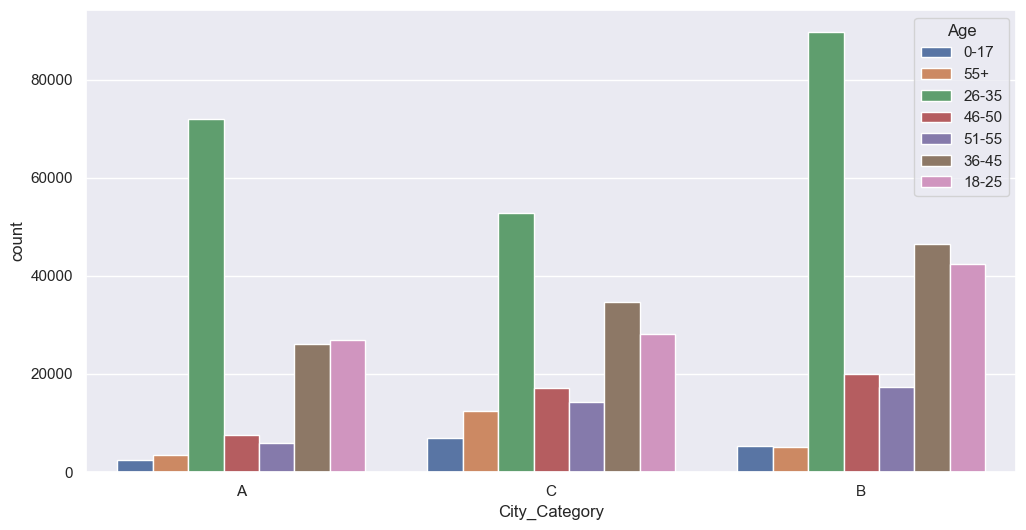

In [18]:
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<AxesSubplot:ylabel='None'>

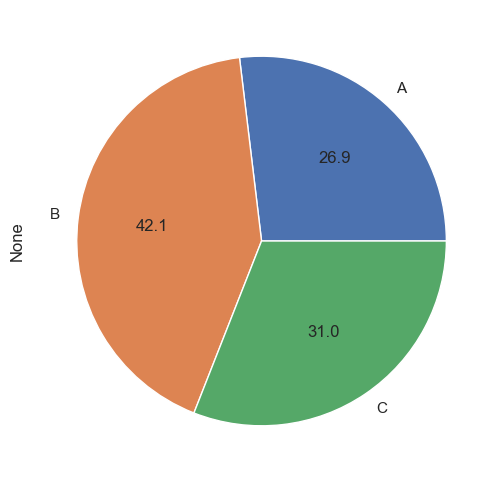

In [19]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

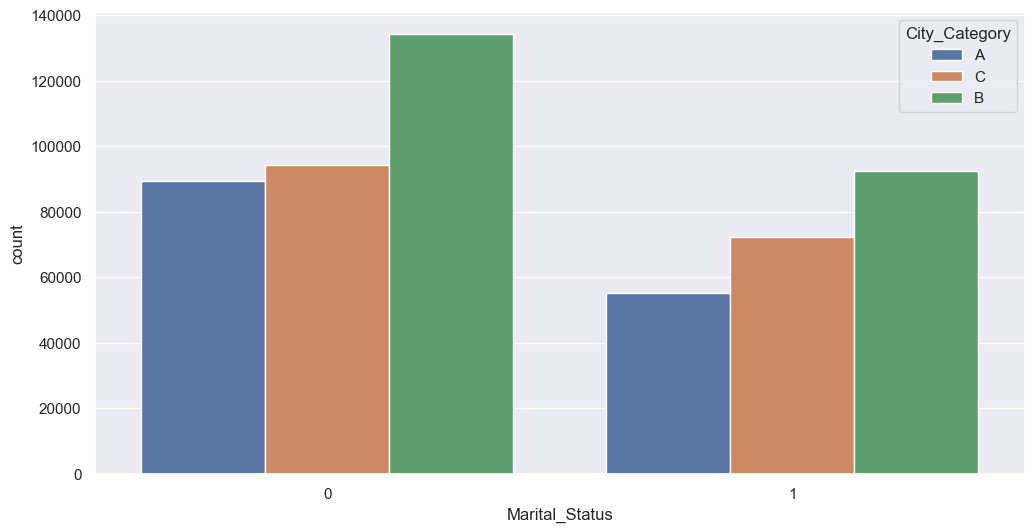

In [20]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<AxesSubplot:ylabel='Purchase'>

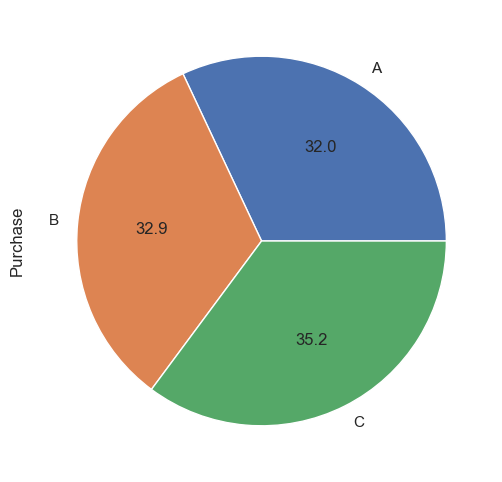

In [21]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

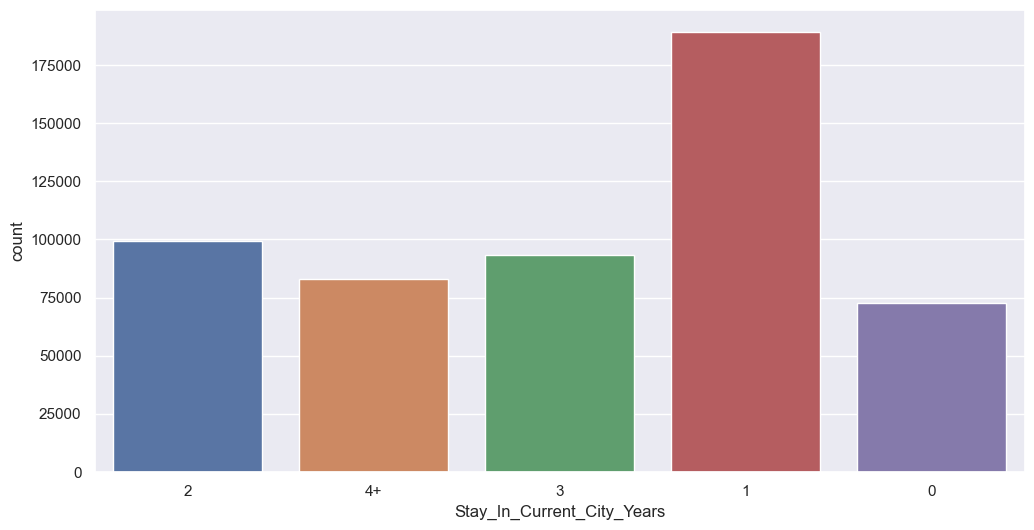

In [22]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<AxesSubplot:ylabel='None'>

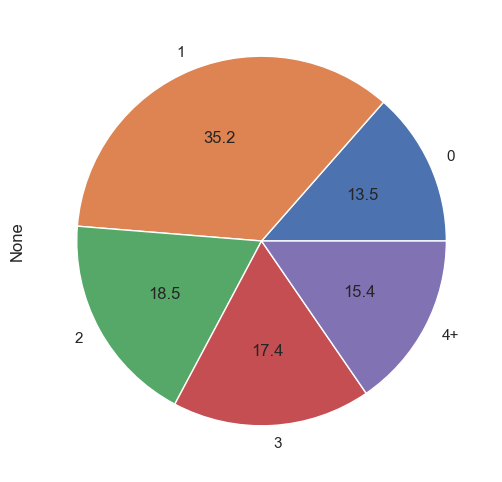

In [23]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%.1f")

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

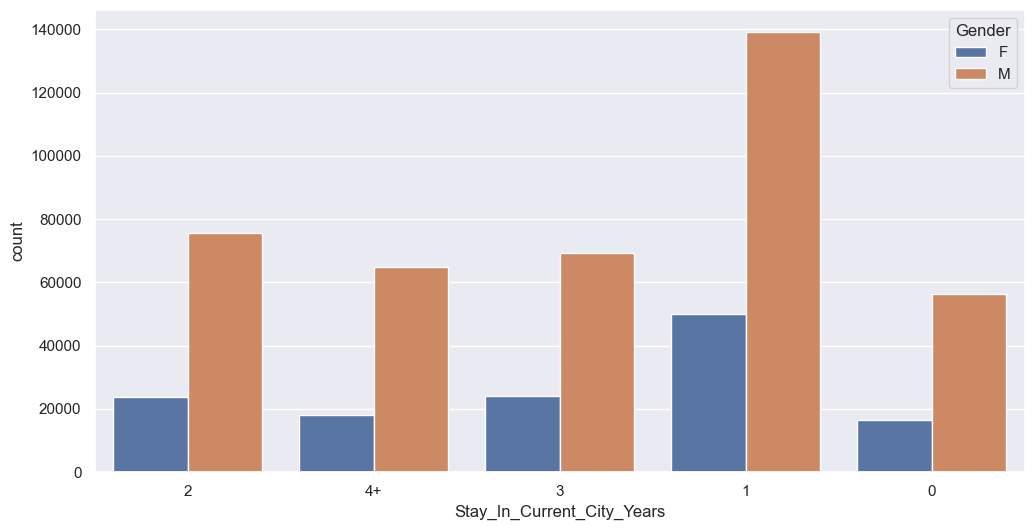

In [24]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

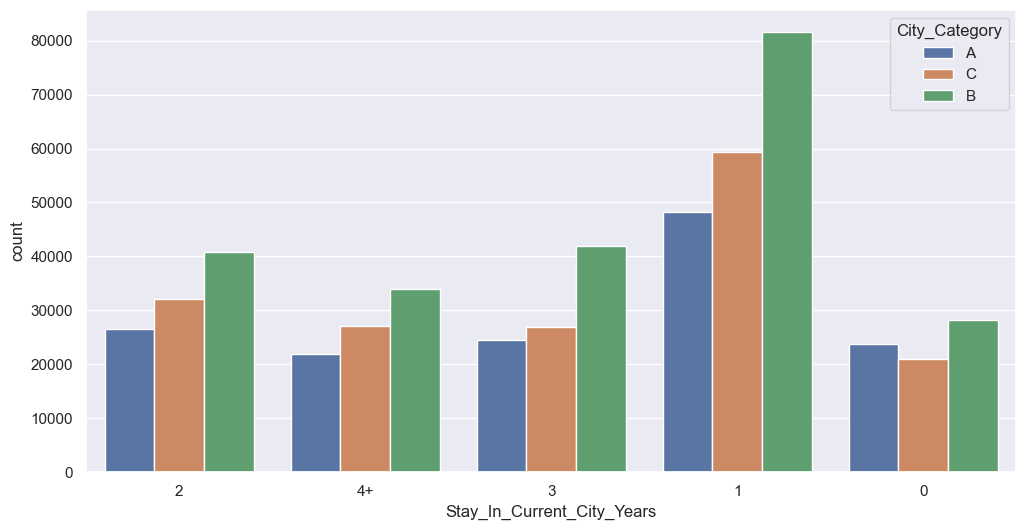

In [25]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

<AxesSubplot:xlabel='Occupation'>

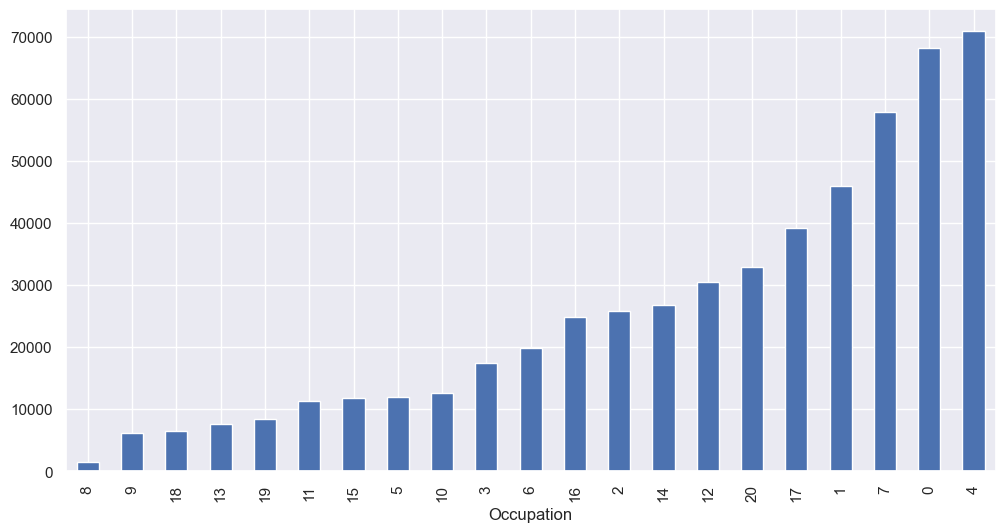

In [26]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Product_Category_1'>

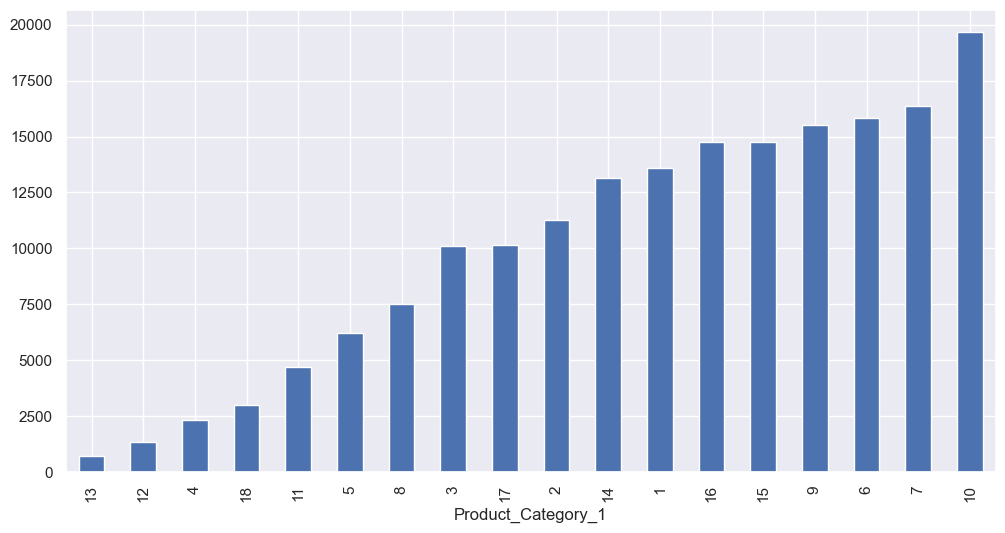

In [29]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Occupation', ylabel='count'>

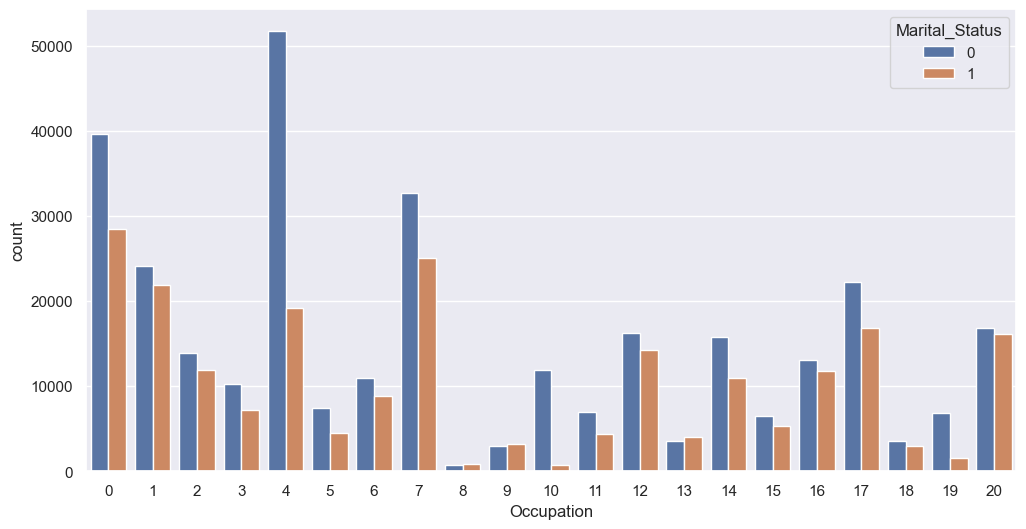

In [27]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

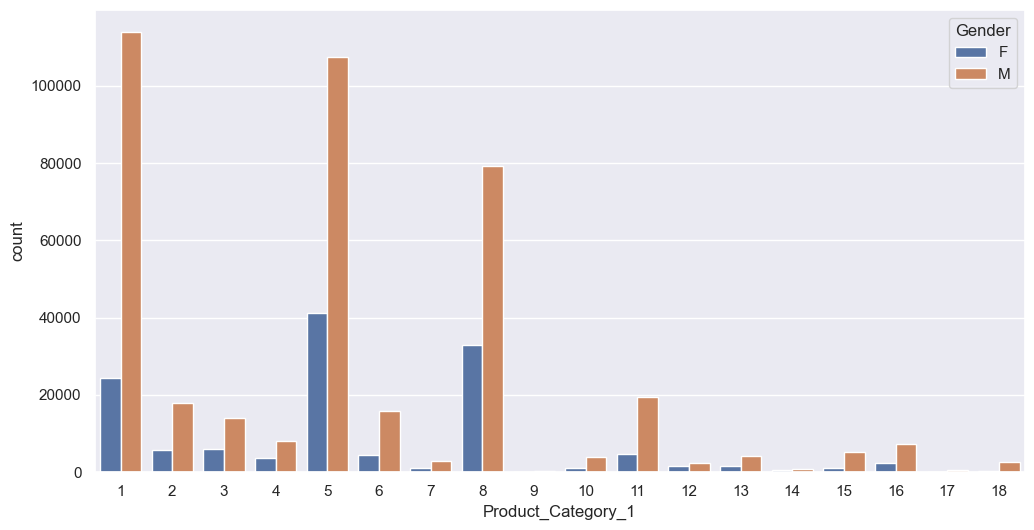

In [28]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)